In [141]:
import pandas as pd

df = pd.read_csv("C:/Users/js2-3/Desktop/data/titanic/train.csv")
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [144]:
# null 값 처리
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [145]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [146]:
df.Cabin.value_counts()

Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [147]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64

In [148]:
df['Cabin'] = df['Cabin'].str[0]
df.Cabin.value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [149]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

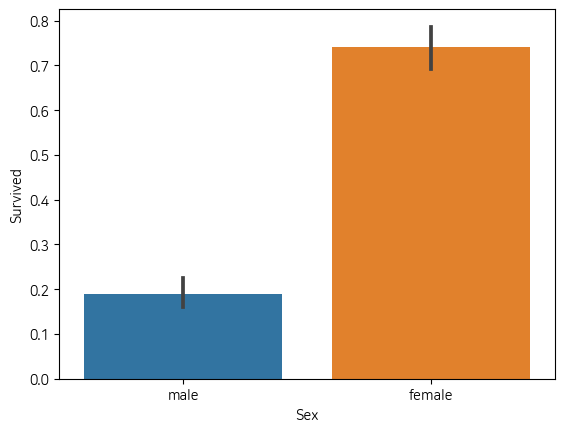

In [150]:
import seaborn as sns

sns.barplot(data=df, x='Sex', y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

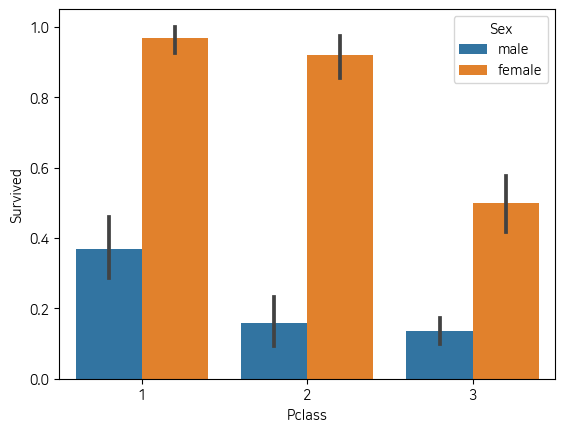

In [151]:
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')

In [152]:
def get_category(age):
    cat=''
    if age <= -1 : cat="Unknown"
    elif age <= 5 : cat="Infant"
    elif age <= 12 : cat="Child"
    elif age <= 18 : cat="Teen"
    elif age <= 25 : cat="Student"
    elif age <= 35 : cat="Young Adult"
    elif age <= 60 : cat="Adult"
    else: cat='Senior'
    return cat

In [153]:
df['Age_cat'] = df.Age.apply(lambda x : get_category(x))

<Axes: xlabel='Age_cat', ylabel='Survived'>

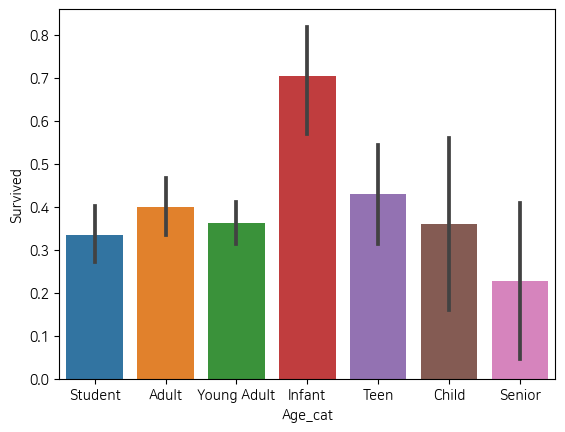

In [154]:
sns.barplot(data=df, y='Survived', x='Age_cat')

<Axes: xlabel='Age_cat', ylabel='Survived'>

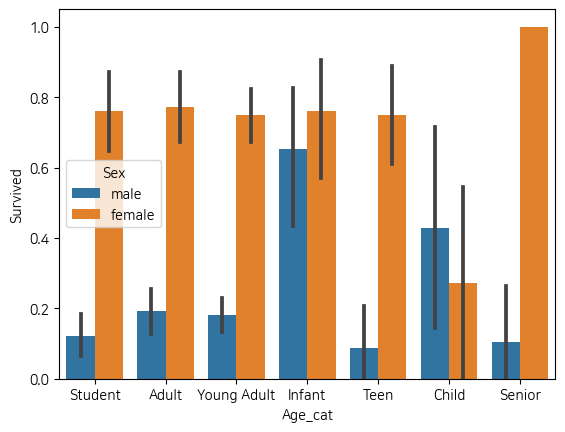

In [155]:
sns.barplot(data=df, y='Survived', x='Age_cat', hue='Sex')

<Axes: xlabel='Age_cat', ylabel='Survived'>

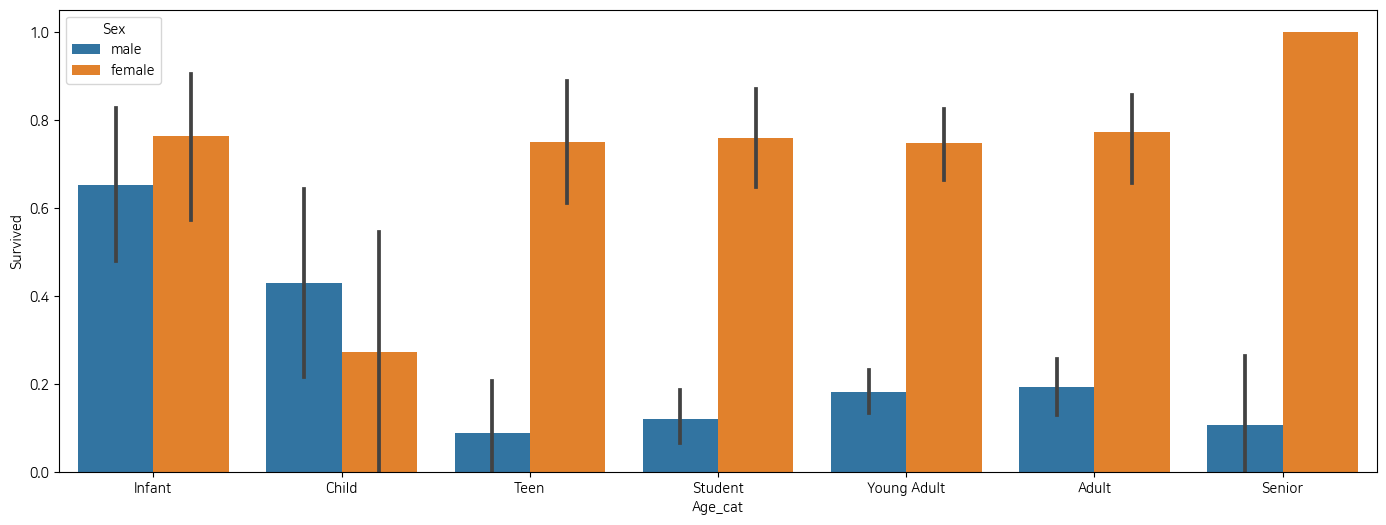

In [156]:
import matplotlib.pyplot as plt

order_name = ['Infant', 'Child', 'Teen', 'Student', 'Young Adult', 'Adult', 'Senior']

plt.figure(figsize=(17, 6))
sns.barplot(data=df, y='Survived', x='Age_cat', hue='Sex', order=order_name)

In [157]:
def encode_features(dataDF):
    from sklearn.preprocessing import LabelEncoder
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        dataDF[feature] = le.fit_transform(dataDF[feature])
    return dataDF

In [158]:
result = encode_features(df)
result

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0,Young Adult


In [159]:
# [Preprocessing Functions]

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df.Cabin.str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [160]:
# 실행 과정

# [파일 호출]
df = pd.read_csv("C:/Users/js2-3/Desktop/data/titanic/train.csv")

# [데이터 전처리]
y = df.Survived
x = df.drop(columns=['Survived'])
x = transform_features(x)  # 전처리 함수 호출

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


In [161]:
# [모델 학습 및 평가]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=200)

dt_clf.fit(X_train, y_train)
pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, pred_dt)
print(accuracy_dt)

rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, pred_rf)
print(accuracy_rf)

lr_clf.fit(X_train, y_train)
pred_lr = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred_lr)
print(accuracy_lr)

0.7877094972067039
0.8547486033519553
0.8491620111731844


In [162]:
# 하이퍼파라미터 튜닝 및 교차검증

from sklearn.model_selection import GridSearchCV

param = {
    'max_depth' : [2,3,5,10],
    'min_samples_split' : [2,3,5],
    'min_samples_leaf' : [1,5,8]
}

grid_dt = GridSearchCV(dt_clf, param_grid=param, scoring='accuracy', cv=5)
grid_rf = GridSearchCV(rf_clf, param_grid=param, scoring='accuracy', cv=5)


grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

bestParam_dt = grid_dt.best_params_
bestParam_rf= grid_rf.best_params_

print(bestParam_dt)
print(bestParam_rf)

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [163]:
grid_dt.best_score_

0.7991825076332119

In [164]:
grid_rf.best_score_

0.8145966709346991

In [165]:
pred_dt = grid_dt.best_estimator_.predict(X_test)
pred_rf = grid_rf.best_estimator_.predict(X_test)

print(accuracy_score(y_test, pred_dt))
print(accuracy_score(y_test, pred_rf))

0.8715083798882681
0.88268156424581
